## Classification - Prediction of Iris species : setosa, versicolor,virginica

#### 1. Exploratory Data Analysis
##### 1.1 import library

In [3]:
# pandas - data analysis library
import pandas as pd

#scientific computing library
import numpy as np

# data visualization library
import matplotlib.pyplot as plt

# for high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

##### 1.2 import dataset. Dataset is downloaded from kaggle

In [10]:
# read dataset and assign to df_iris. make sure the data is same working directory
df_iris = pd.read_csv('iris.csv')

In [12]:
# check first five row of dataframe
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# get summary
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [23]:
# statistic summary
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
#findout no of rows for each Species. to check whether dataset is balanced or not
print(df_iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


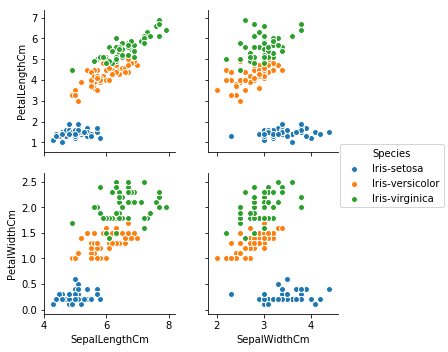

In [95]:
sns.pairplot(df_iris,x_vars=['SepalLengthCm','SepalWidthCm'], 
             y_vars=['PetalLengthCm','PetalWidthCm'],hue='Species')


In [98]:
#Defining data and label
X = df_iris.iloc[:, 1:5]
y = df_iris.iloc[:, 5]

In [104]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


In [105]:
#Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)